In [1]:
import pandas as pd

In [54]:
df = pd.read_csv('xAPI-Edu-Data.csv')


In [254]:
df = df.dropna()
df["StudentAbsenceDays"].replace({'Above-7':0 , 'Under-7' : 1},inplace = True)
df["ParentAnsweringSurvey"].replace({'No':0 , 'Yes' : 1},inplace = True)
df["ParentschoolSatisfaction"].replace({'Bad':0 , 'Good' : 1},inplace = True)
df["Relation"].replace({'Mum':0 , 'Father' : 1},inplace = True)

In [255]:
from sklearn.model_selection import train_test_split
X =  df[["Relation","raisedhands","VisITedResources","AnnouncementsView","Discussion","ParentAnsweringSurvey","ParentschoolSatisfaction","StudentAbsenceDays"]]
y = df.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=93)

In [379]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=128)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=128)

In [380]:
y_pred = model.predict(X_test)

In [384]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.82      0.96      0.88        24
           2       0.88      0.73      0.80        49

    accuracy                           0.81        96
   macro avg       0.80      0.84      0.81        96
weighted avg       0.82      0.81      0.81        96



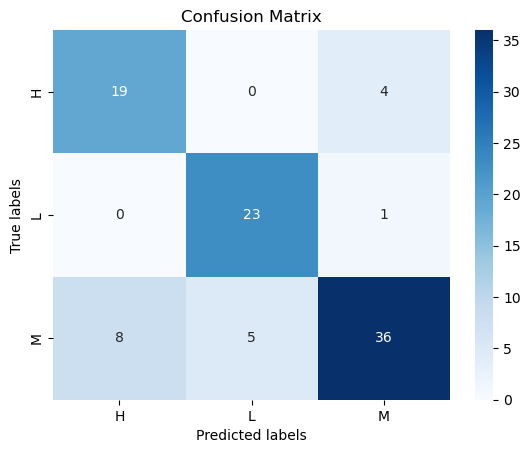

In [387]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
class_labels = ['H', 'L', 'M']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()